# Ungraded Lab: Training with ImageDataGenerator

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-04-30 18:35:41--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   197MB/s    in 0.7s    

2022-04-30 18:35:42 (197 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import zipfile
# unzip the dataset
local_zip = "./horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("./horse-or-human")
zip_ref.close()

In [3]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join("./horse-or-human/horses")

# Directory with our training human pictures
train_human_dir = os.path.join("./horse-or-human/humans")

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse22-0.png', 'horse22-2.png', 'horse14-6.png', 'horse21-7.png', 'horse35-3.png', 'horse31-2.png', 'horse33-3.png', 'horse26-3.png', 'horse08-4.png', 'horse24-4.png']
['human04-19.png', 'human07-24.png', 'human10-08.png', 'human14-05.png', 'human14-24.png', 'human11-13.png', 'human04-05.png', 'human10-07.png', 'human03-23.png', 'human12-07.png']


In [5]:
print("total training horse images:", len(os.listdir(train_horse_dir)))
print("total training human images:", len(os.listdir(train_human_dir)))


total training horse images: 500
total training human images: 527


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mping

# parameters for our graph; we'll output images in a 4x4 confugiration
nrows = 4
ncols = 4

pic_index = 0

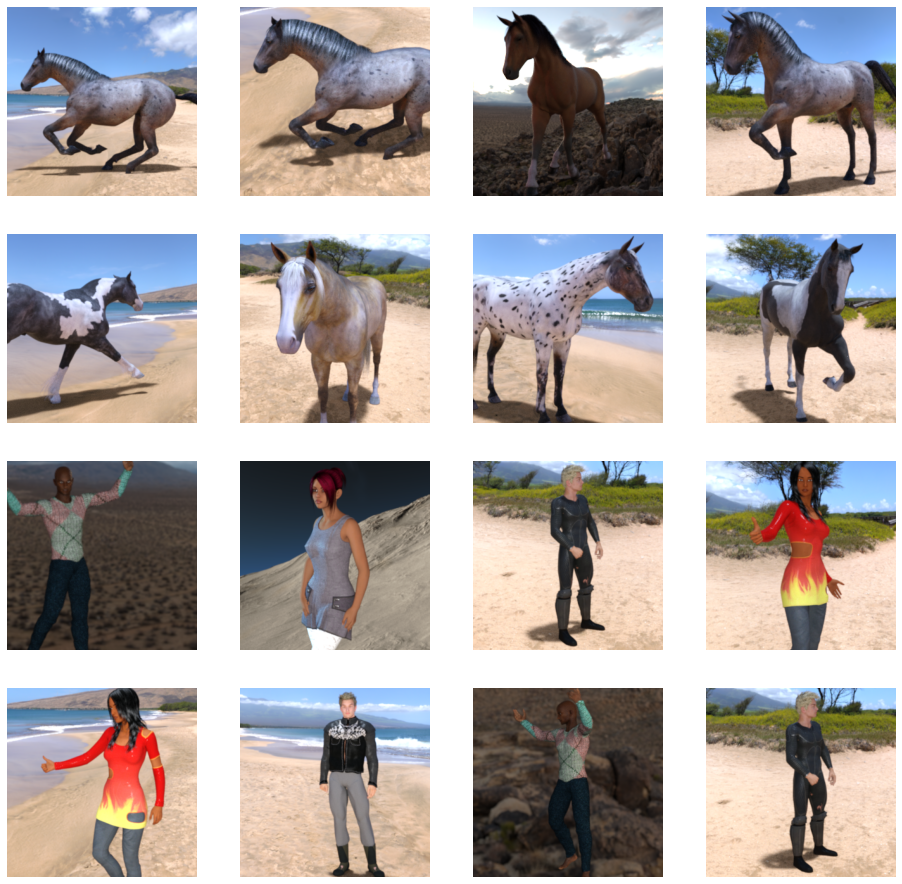

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # set up subplot subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis("off")

    img = mping.imread(img_path)
    plt.imshow(img)

plt.show()

# Building a Small Model from Scratch

In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512, activation="relu"),

                                    tf.keras.layers.Dense(1, activation="sigmoid")


])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(learning_rate=0.001),
              metrics=["accuracy"])


# Data Preprocessing

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images will be rescald by 1./255
train_datagen = ImageDataGenerator(rescale= 1/255)

# Flow training images in batches of  128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "./horse-or-human/", # this is source directory for training images
    target_size=(300,300), # All images will be  resized to 300x300
    batch_size=128,
    class_mode="binary")# since we use binary_crossentropy loss, we need binary labels

Found 1027 images belonging to 2 classes.


# Training

In [13]:
history = model.fit(train_generator, 
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1)

Epoch 1/15
8/8 [==============================] - 21s 740ms/step - loss: 0.7527 - accuracy: 0.5106
Epoch 2/15
8/8 [==============================] - 6s 718ms/step - loss: 0.6463 - accuracy: 0.6630
Epoch 3/15
8/8 [==============================] - 6s 724ms/step - loss: 0.5649 - accuracy: 0.7620
Epoch 4/15
8/8 [==============================] - 7s 812ms/step - loss: 0.4311 - accuracy: 0.8428
Epoch 5/15
8/8 [==============================] - 6s 726ms/step - loss: 0.8437 - accuracy: 0.8643
Epoch 6/15
8/8 [==============================] - 6s 706ms/step - loss: 0.1641 - accuracy: 0.9533
Epoch 7/15
8/8 [==============================] - 6s 726ms/step - loss: 0.1798 - accuracy: 0.9266
Epoch 8/15
8/8 [==============================] - 7s 804ms/step - loss: 0.0977 - accuracy: 0.9600
Epoch 9/15
8/8 [==============================] - 6s 721ms/step - loss: 0.1601 - accuracy: 0.9333
Epoch 10/15
8/8 [==============================] - 6s 713ms/step - loss: 0.0482 - accuracy: 0.9833
Epoch 11/15
8/8 [=

# Model Prediction

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    #predicting images
    path = "/content/"+ fn
    img = image.load_img(path, target_size=(300,300))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])

    if classes[0] > 0.5:
        print(fn+ " is a human")
    else:
        print(fn+ " is a horse")

Saving portrait-g207a9d08c_640.jpg to portrait-g207a9d08c_640.jpg
[1.]
portrait-g207a9d08c_640.jpg is a human


# Visualizing Intermediate Representations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


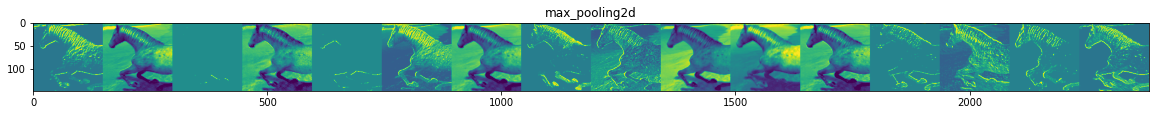

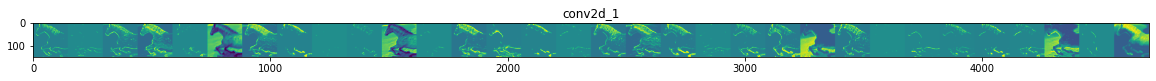

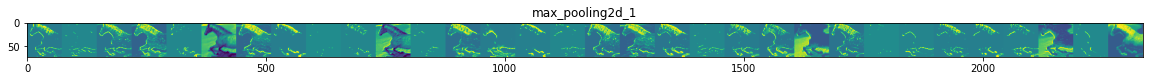

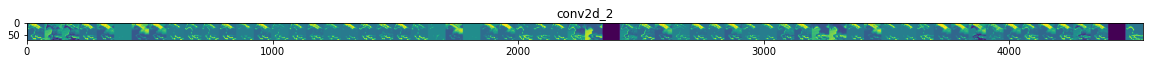

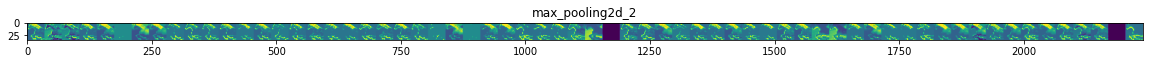

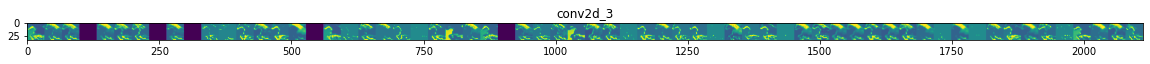

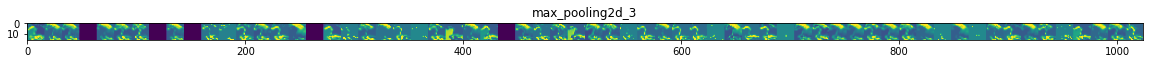

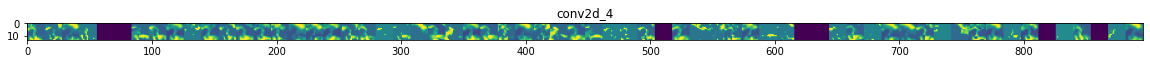

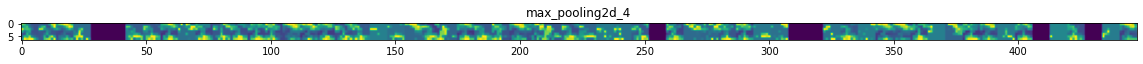

In [18]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')